# Breast Cancer Classification

Breast cancer is one of the most common and potentially fatal cancers among women worldwide. Early detection and accurate diagnosis are crucial in improving patient outcomes and survival rates. With the advent of medical technology and the accumulation of vast amounts of clinical data, machine learning techniques have emerged as powerful tools to aid in the early detection and diagnosis of breast cancer.

This dataset, sourced from the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features describe the characteristics of the cell nuclei present in the images, such as radius, texture, perimeter, area, and smoothness, among others. The primary objective is to classify the breast cancer diagnosis as malignant (M) or benign (B) based on these features.

### Problem Statement

The goal of this project is to develop and evaluate machine learning models capable of accurately classifying breast cancer tumors as malignant or benign. This classification task will leverage the 30 features extracted from the FNA images, aiming to build a predictive model that can assist healthcare professionals in making more informed decisions.

By analyzing the patterns and relationships within the dataset, the project aims to achieve the following:
1. **Data Collection and Preprocessing**: explore the data to prepare it for further stages.
2. **Further Data Analysis**: Perform Exploratory data analysis to understand the most relevant features.
3. **Model Development**: Train and evaluate various machine learning algorithms to find the best-performing model for this classification task.
4. **Model Evaluation**: Assess the model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure its reliability and robustness.



## 1. Data Collection and Preprocessing

In [67]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
df = pd.read_csv("data.csv")

df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [70]:
df.shape

(569, 33)

In [71]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [72]:
# Checking for missing data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [73]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace =True)

In [74]:
# checking for duplicate values
df.duplicated().sum()

0

In [75]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode the diagnosis column
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Verify the encoding
print(label_encoder.classes_)
print(df['diagnosis'].value_counts())  # Check the distribution

['B' 'M']
diagnosis
0    357
1    212
Name: count, dtype: int64


In [77]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Apply the StandardScaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled['diagnosis'] = y_train.values

## 2. Further Data Analysis

### Summary Statistics

In [79]:
# Descriptive statistics
X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.162306e-16,-3.513673e-17,-1.132183e-16,3.669836e-16,-2.381489e-16,-4.294489e-17,-5.953723e-17,2.225326e-16,1.444510e-16,5.055785e-16,...,-7.027346e-17,-6.754060e-16,-2.928061e-17,1.815398e-16,-1.561632e-17,-2.249727e-16,-7.612958e-17,-8.198570e-17,5.153387e-16,2.147245e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


### visualize the correlation between Features

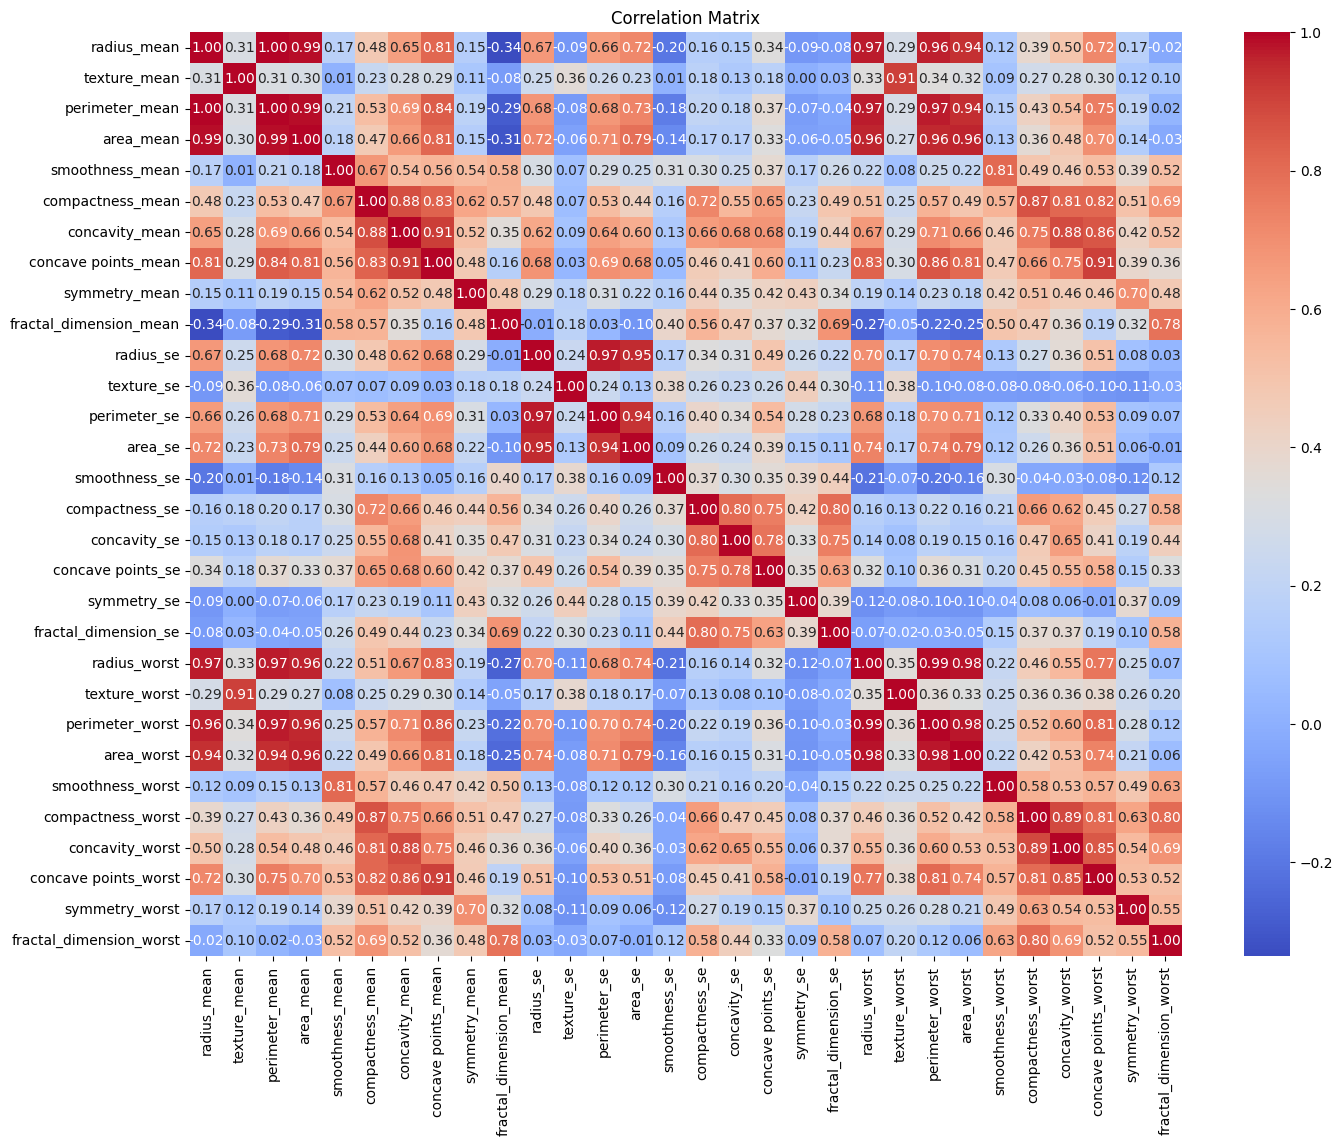

In [80]:
# visualize the correlation
# Compute the correlation matrix
corr_matrix = X_train_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Bivariate Analysis: Target vs. Features Analysis

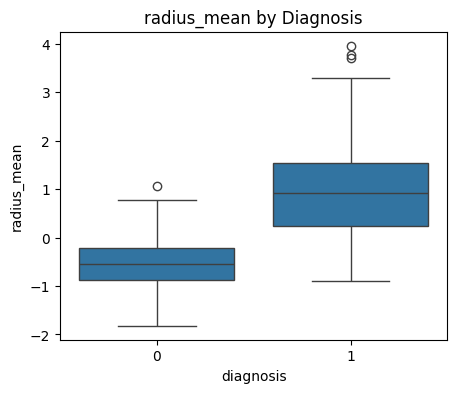

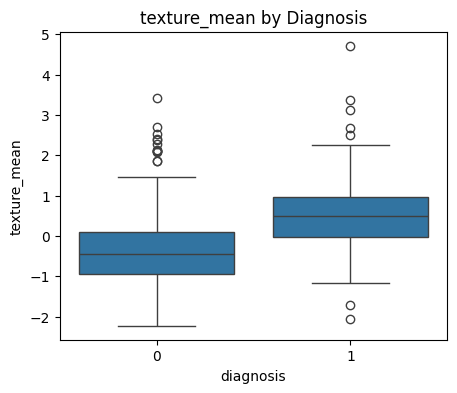

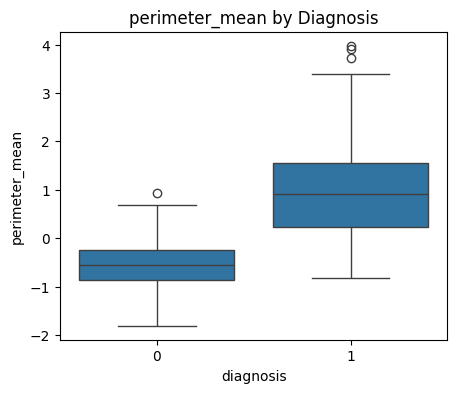

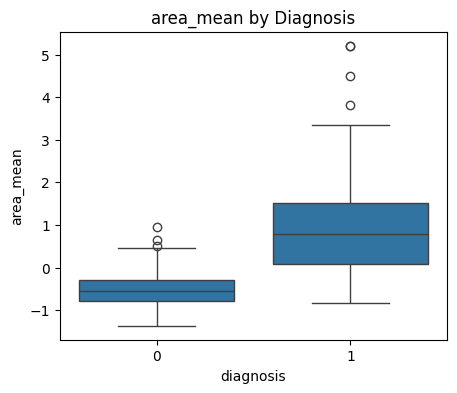

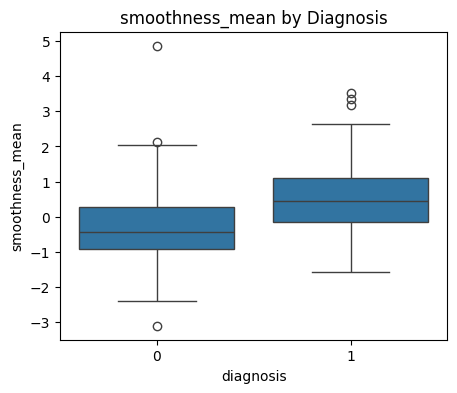

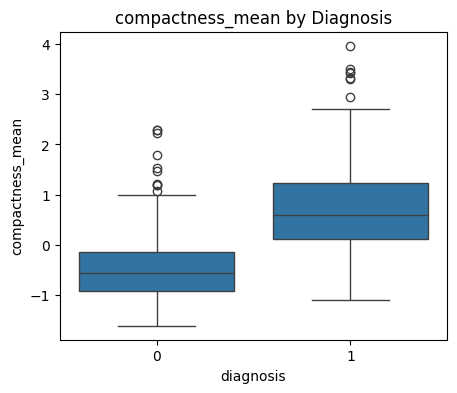

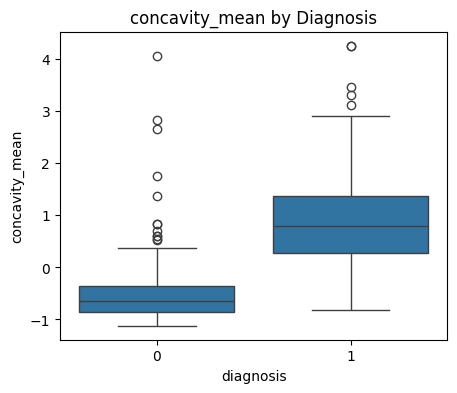

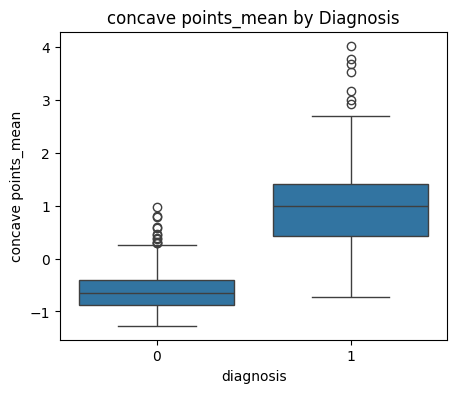

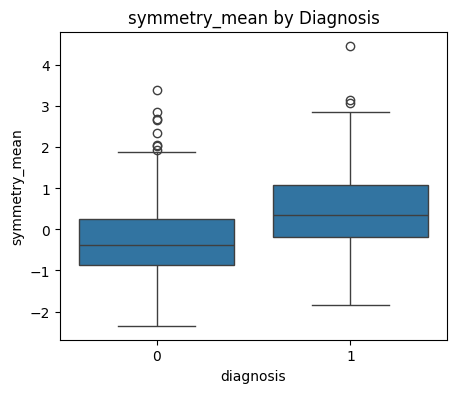

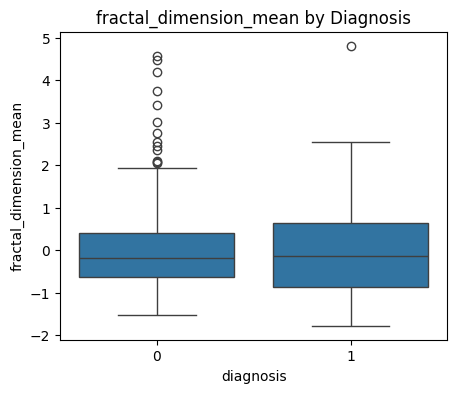

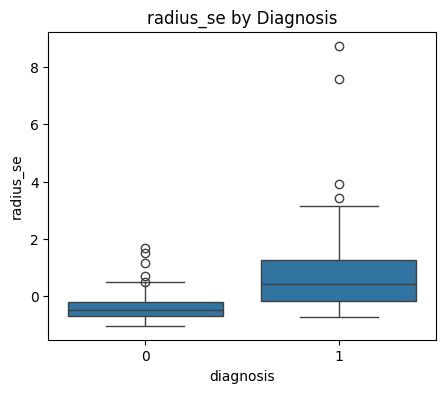

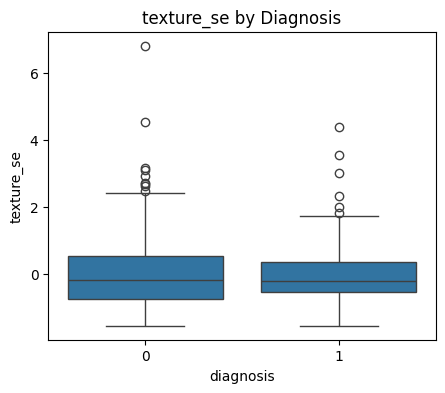

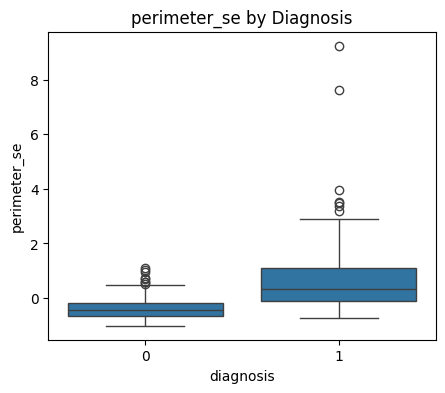

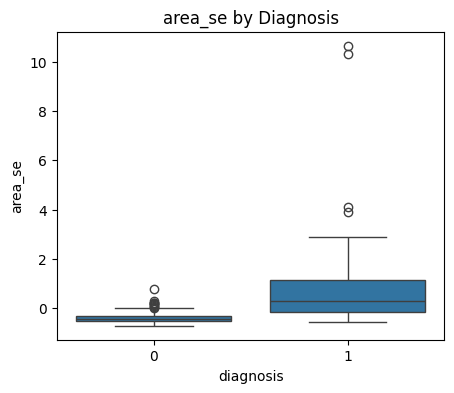

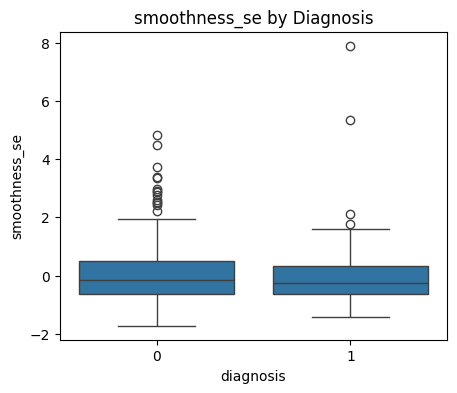

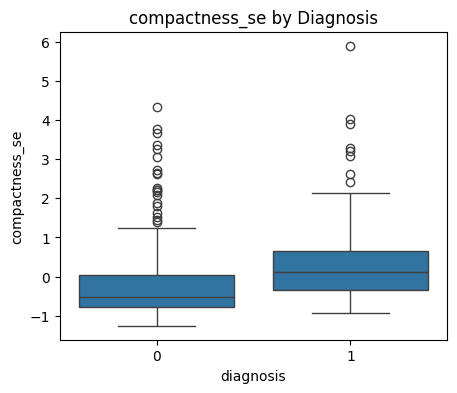

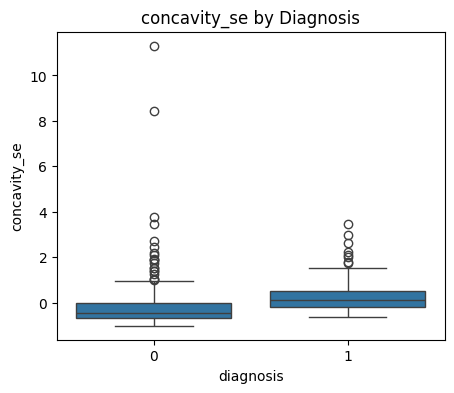

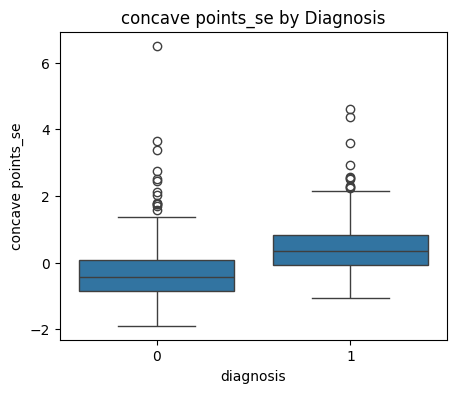

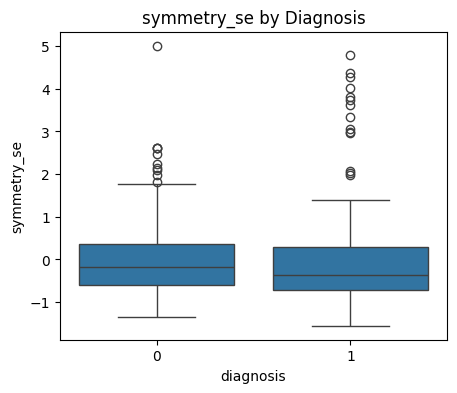

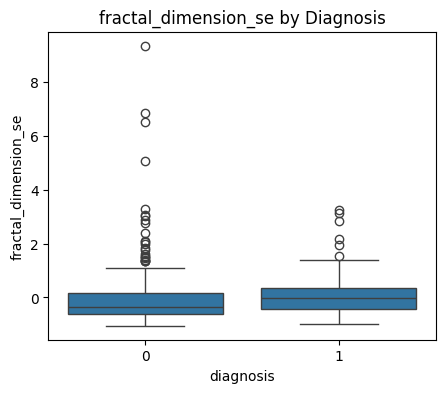

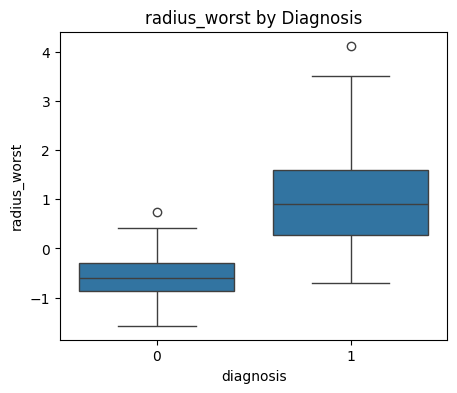

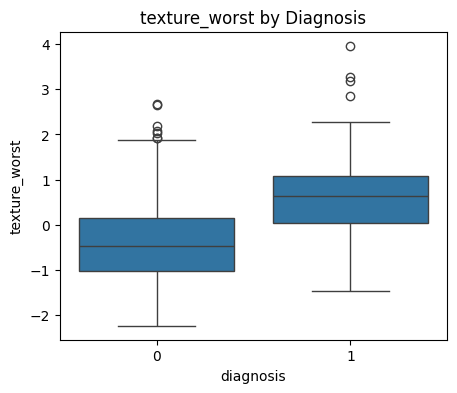

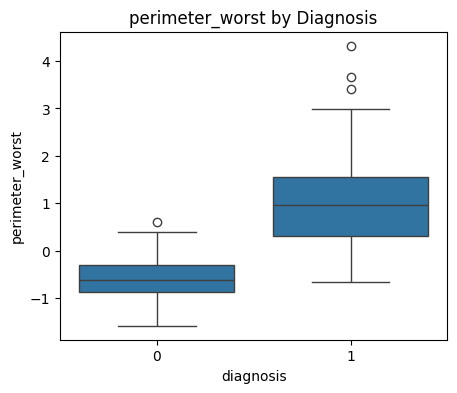

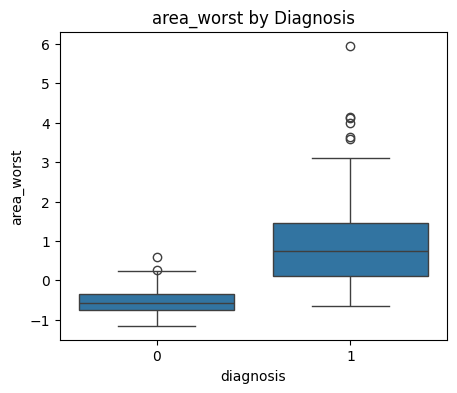

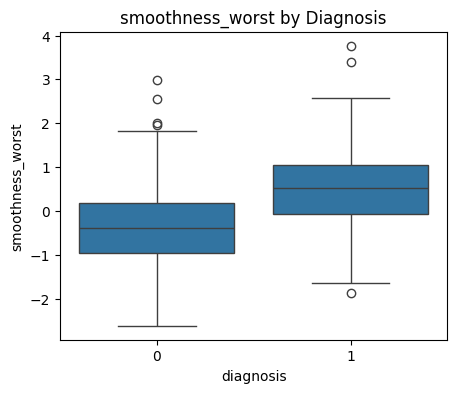

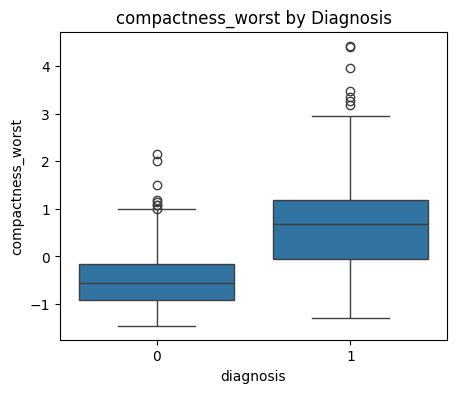

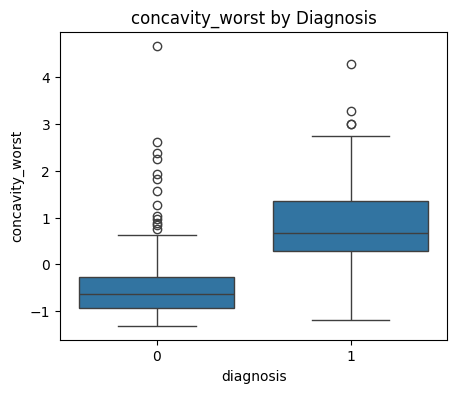

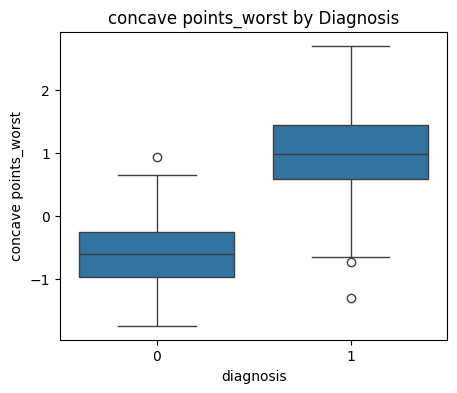

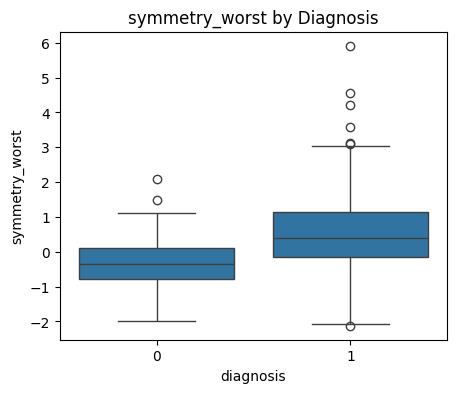

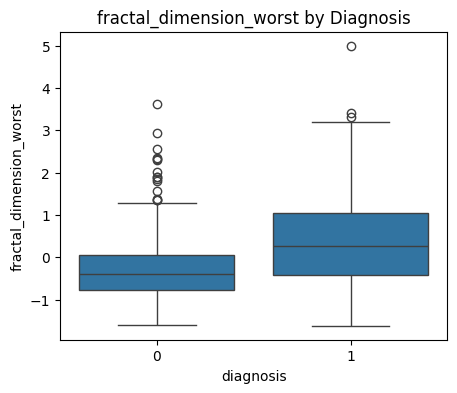

In [84]:
# Create box plots for each feature by 'diagnosis'
for column in X_train_scaled.columns:
    if column != 'diagnosis':
        plt.figure(figsize=(5, 4))
        sns.boxplot(x='diagnosis', y=column, data=X_train_scaled)
        plt.title(f'{column} by Diagnosis')
        plt.show()

### PCA (Principal Component Analysis):
Reduce the dimensionality of the data to visualize it in 2D or 3D.



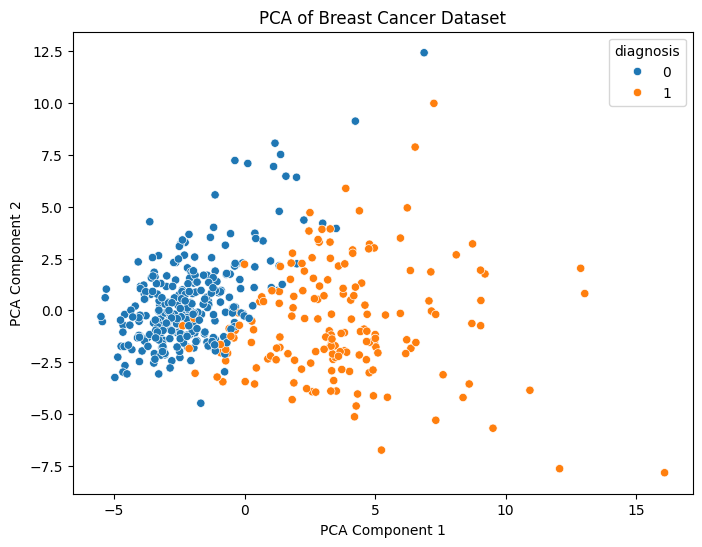

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train_scaled.drop('diagnosis', axis=1))

# Plot the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=X_train_scaled['diagnosis'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()


## 0 for malignant
## 1 for Benign

## 3. Machine learning models

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = tree.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[66  5]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
forest = RandomForestClassifier()
forest.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = forest.predict(X_test_scaled)

# Evaluate the model
print("Random Forest")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### SVM

In [90]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC()
svm.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Support Vector Machine
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = gb.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Neural Network

In [92]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the model
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_scaled.drop('diagnosis', axis=1), y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
print("Neural Networks")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Neural Networks
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## 4. Model Evaluation

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }
    return metrics


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Evaluate models
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train_scaled.drop('diagnosis', axis=1), y_train, X_test_scaled, y_test)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating KNN...
Evaluating Gradient Boosting...
Evaluating Neural Network...


In [97]:
import pandas as pd

summary = pd.DataFrame.from_dict({name: {
    "Accuracy": metrics["Accuracy"],
    "Precision": metrics["Precision"],
    "Recall": metrics["Recall"],
    "F1 Score": metrics["F1 Score"],
    "ROC AUC": metrics["ROC AUC"]
} for name, metrics in results.items()}, orient='index')

print(summary)



                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.973684   0.976190  0.953488  0.964706  0.997380
Decision Tree        0.938596   0.928571  0.906977  0.917647  0.932362
Random Forest        0.964912   0.975610  0.930233  0.952381  0.996397
SVM                  0.982456   1.000000  0.953488  0.976190  0.997380
KNN                  0.947368   0.930233  0.930233  0.930233  0.981985
Gradient Boosting    0.956140   0.952381  0.930233  0.941176  0.995414
Neural Network       0.973684   0.976190  0.953488  0.964706  0.995414
